> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지 설치

In [1]:
############## package
library(lmtest) ##DW test
library(ggplot2)
library(lubridate)
library(gridExtra)


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
options(repr.plot.width = 15, repr.plot.height = 8)


# 삼각함수 그려보기

`-` $sin(x)$: 주기가 2$\pi$인 주기 함수

In [3]:
x <- seq(0,48,0.01)


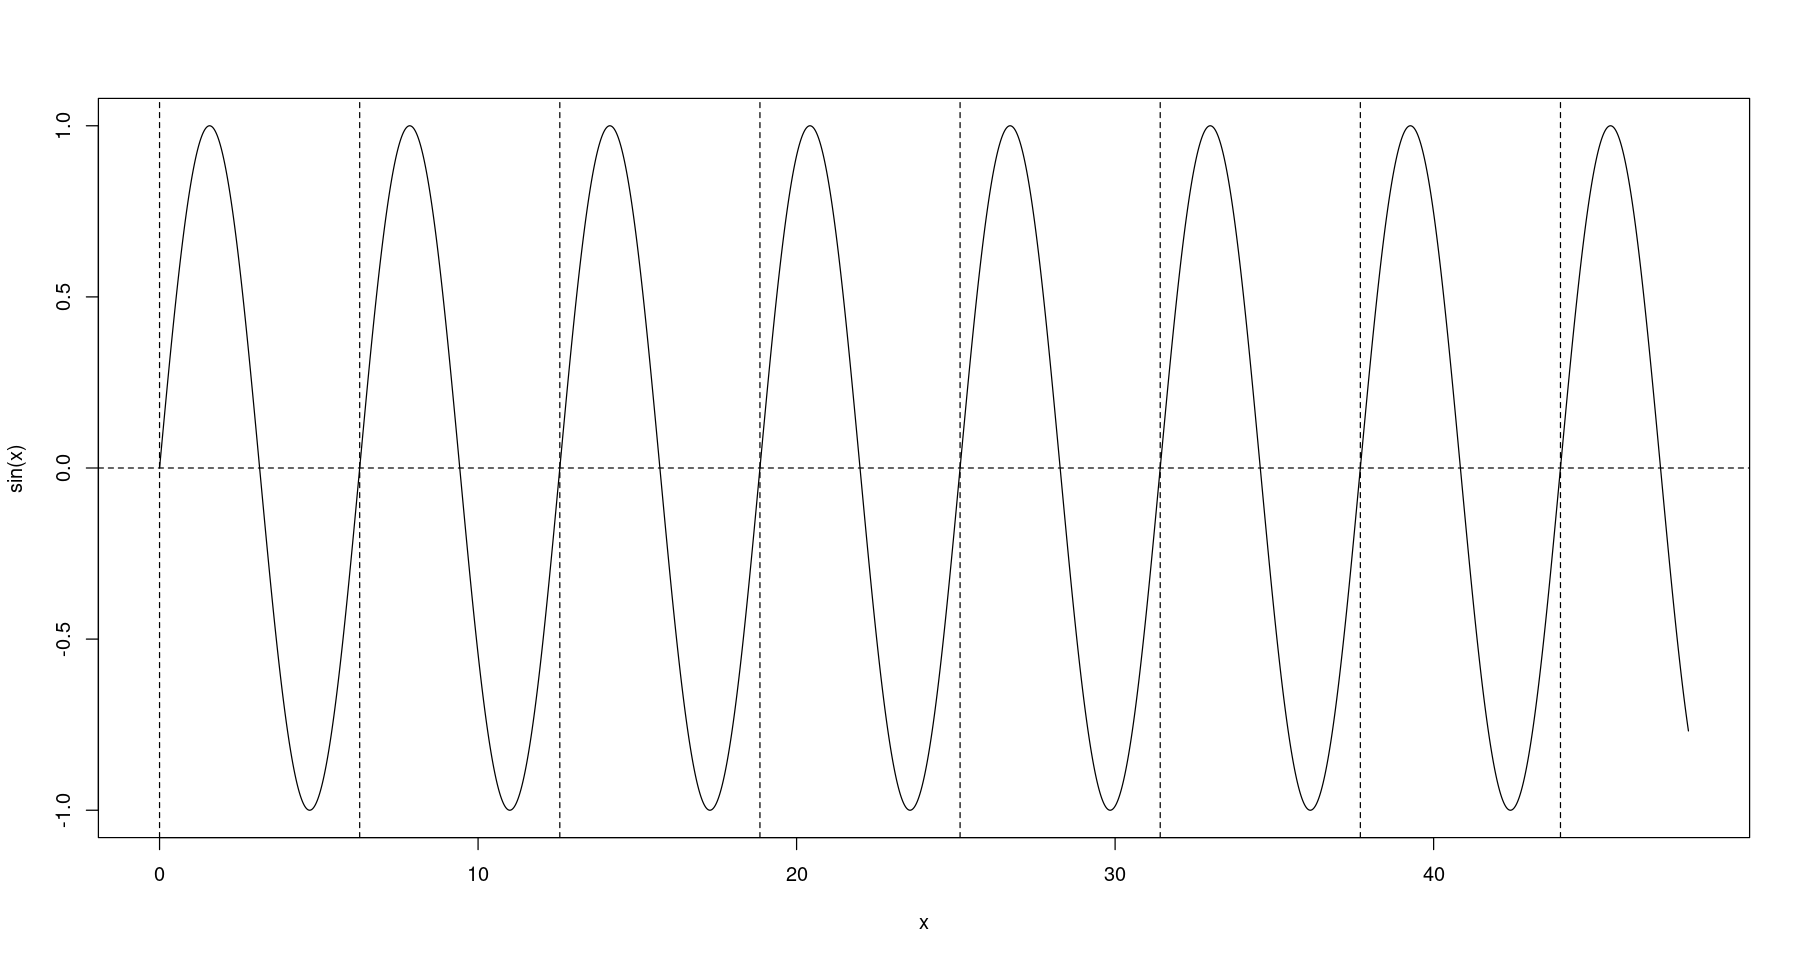

In [4]:
plot(x, sin(x), type='l')
abline(h=0, lty=2)
abline(v=seq(0,48, by = 2*pi), lty=2)

`-` $cos(x)$: 주기가 2$\pi$인 주기 함수

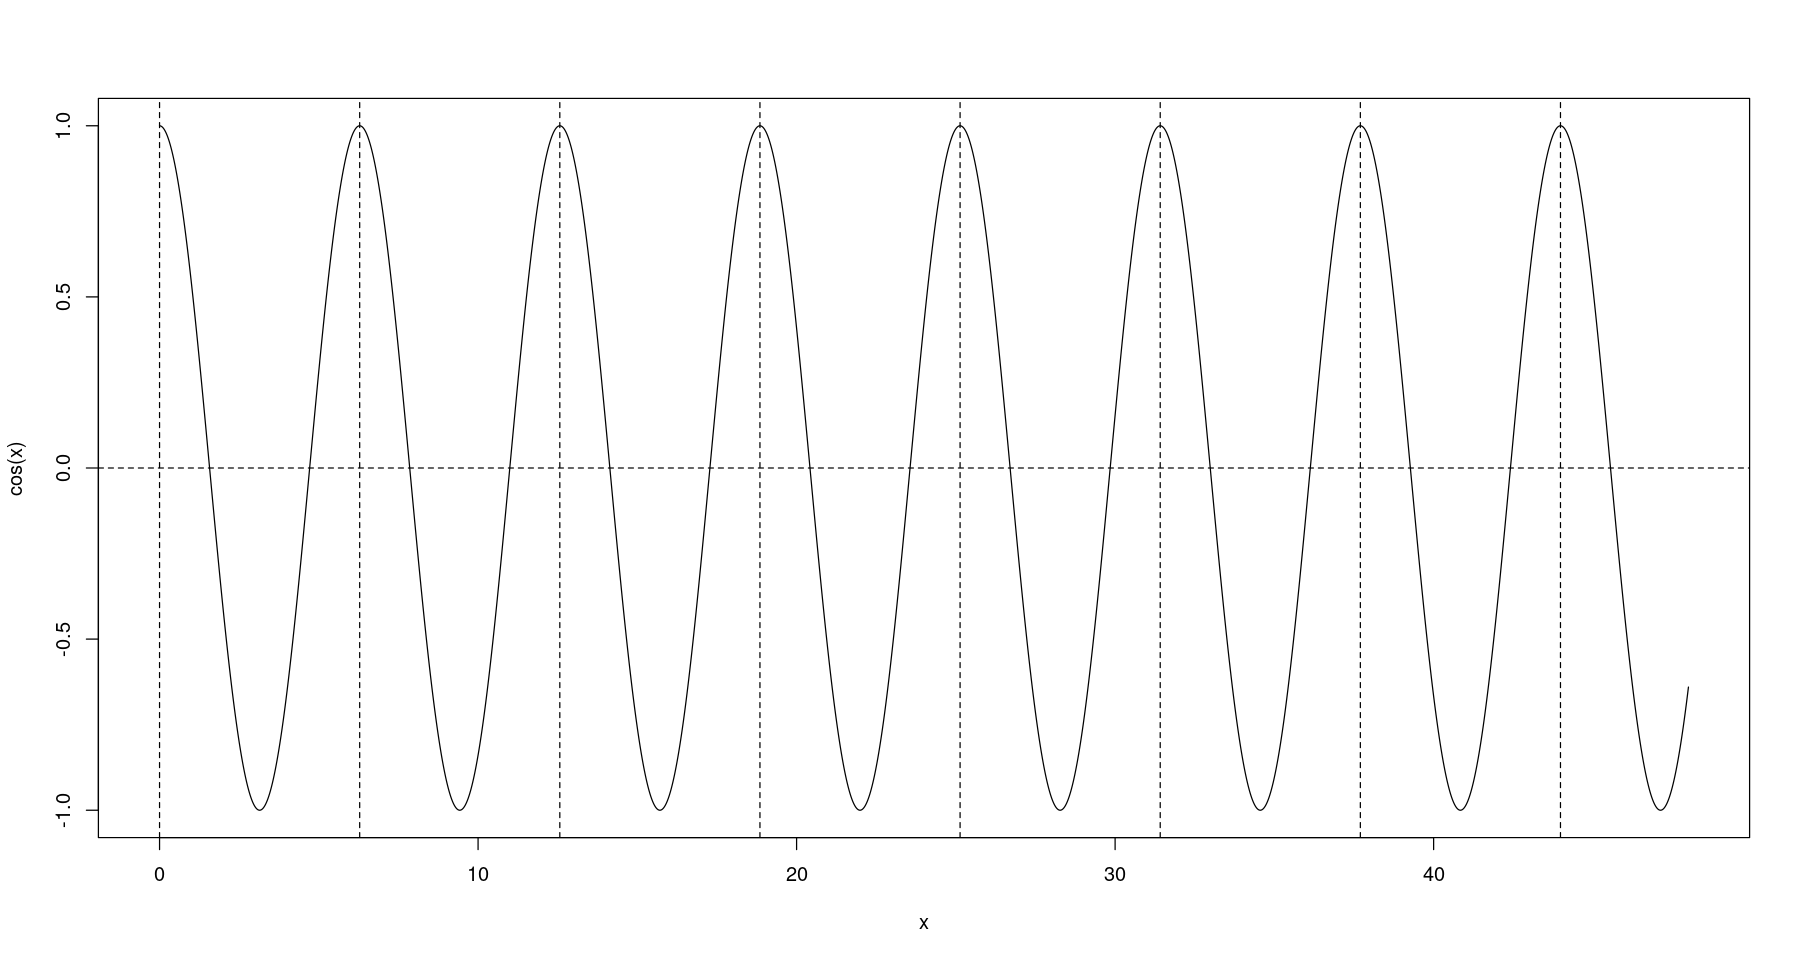

In [5]:
plot(x, cos(x), type='l')
abline(h=0, lty=2)
abline(v=seq(0,48, by = 2*pi), lty=2)


`-` sin 함수의 주기 변동

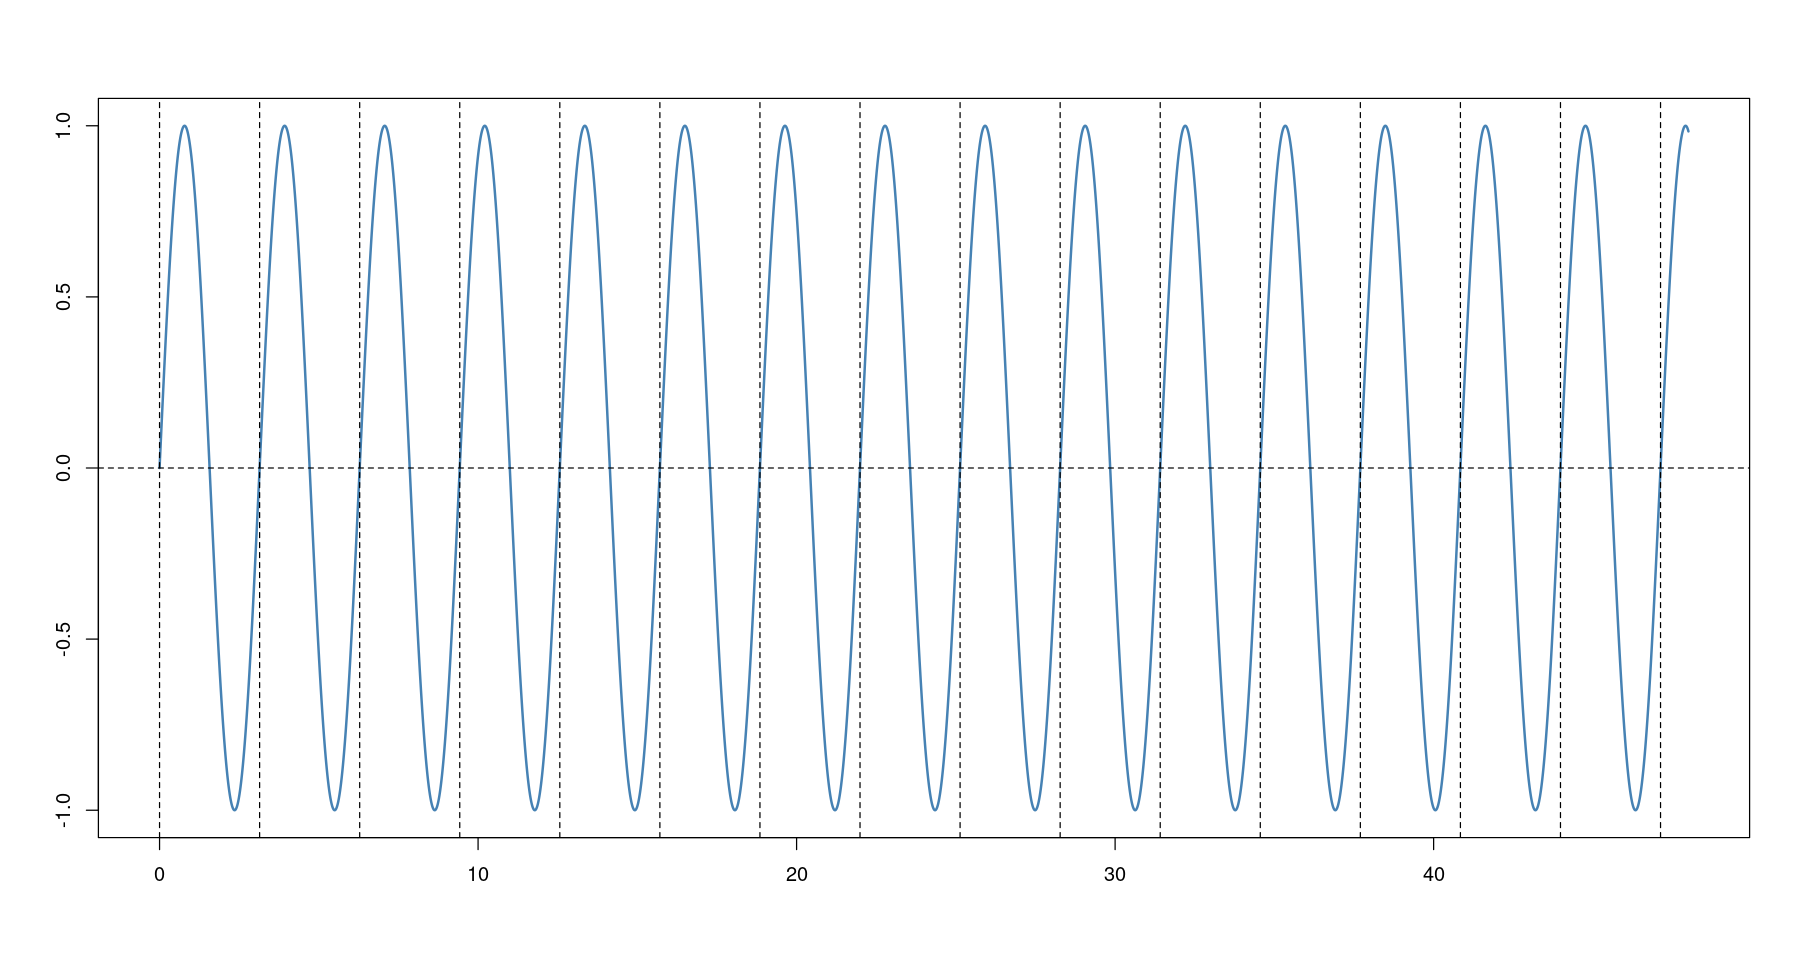

In [6]:
# 주기 = pi
plot(x, sin(2*x), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=pi), lty=2)


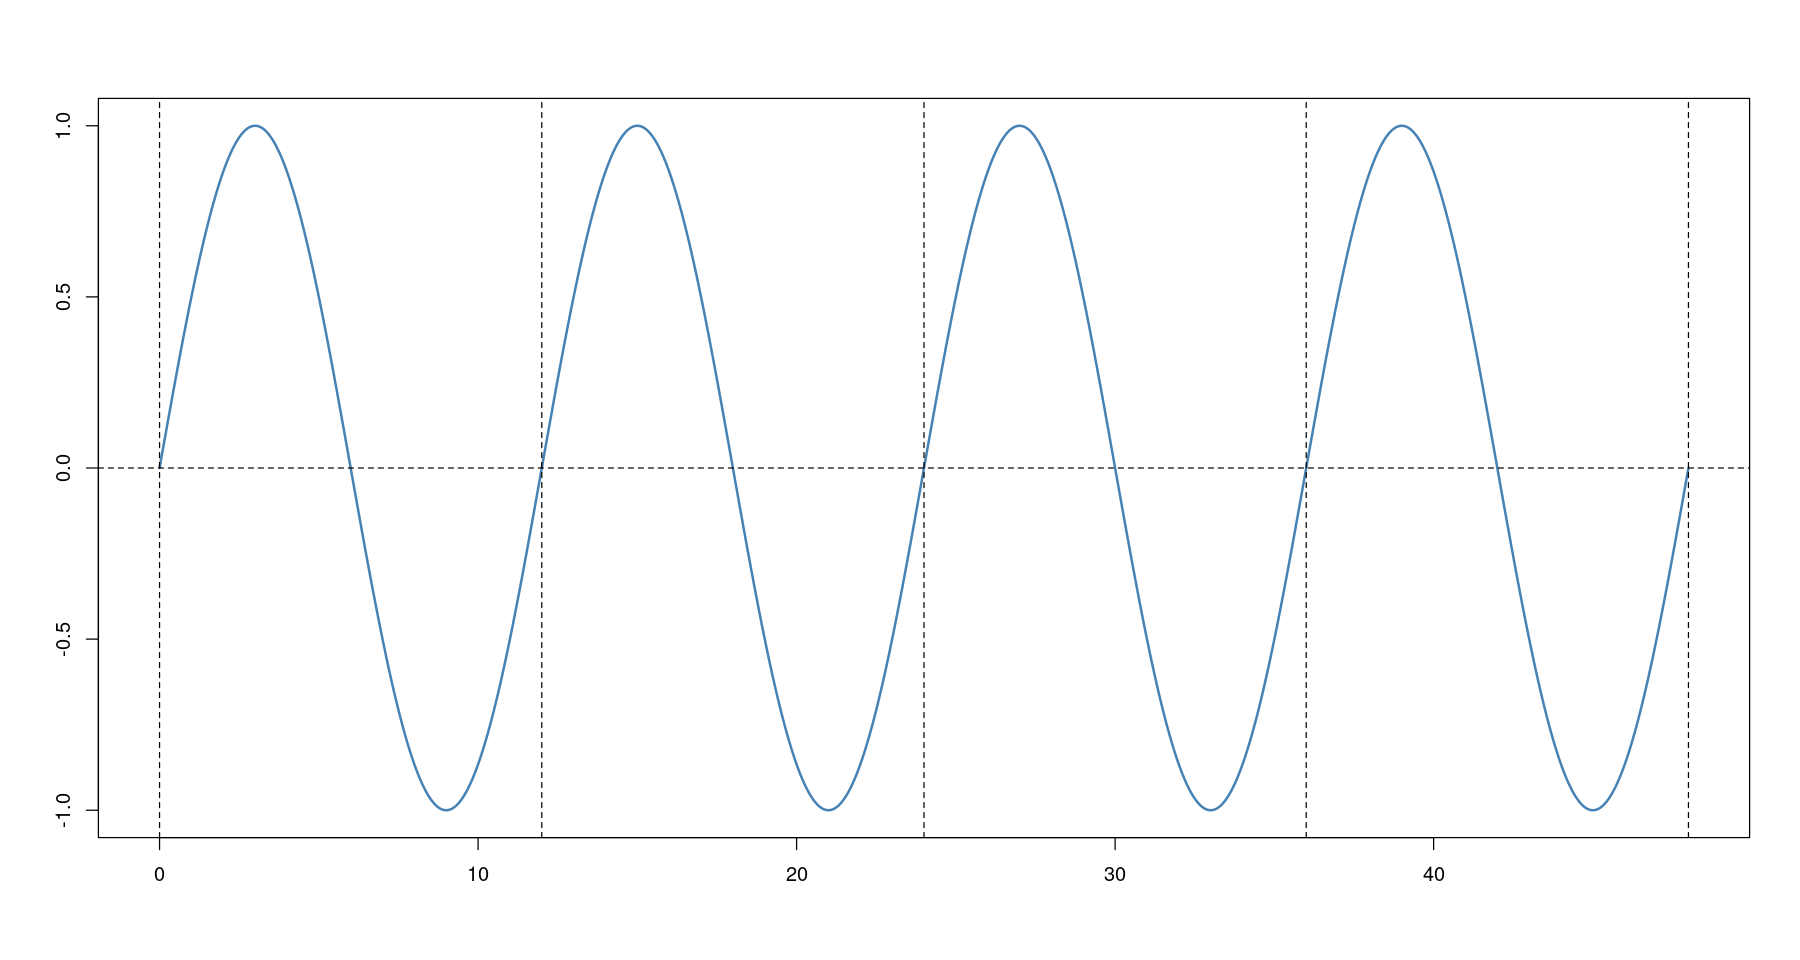

In [7]:
# 주기 = 12
s <- 12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)

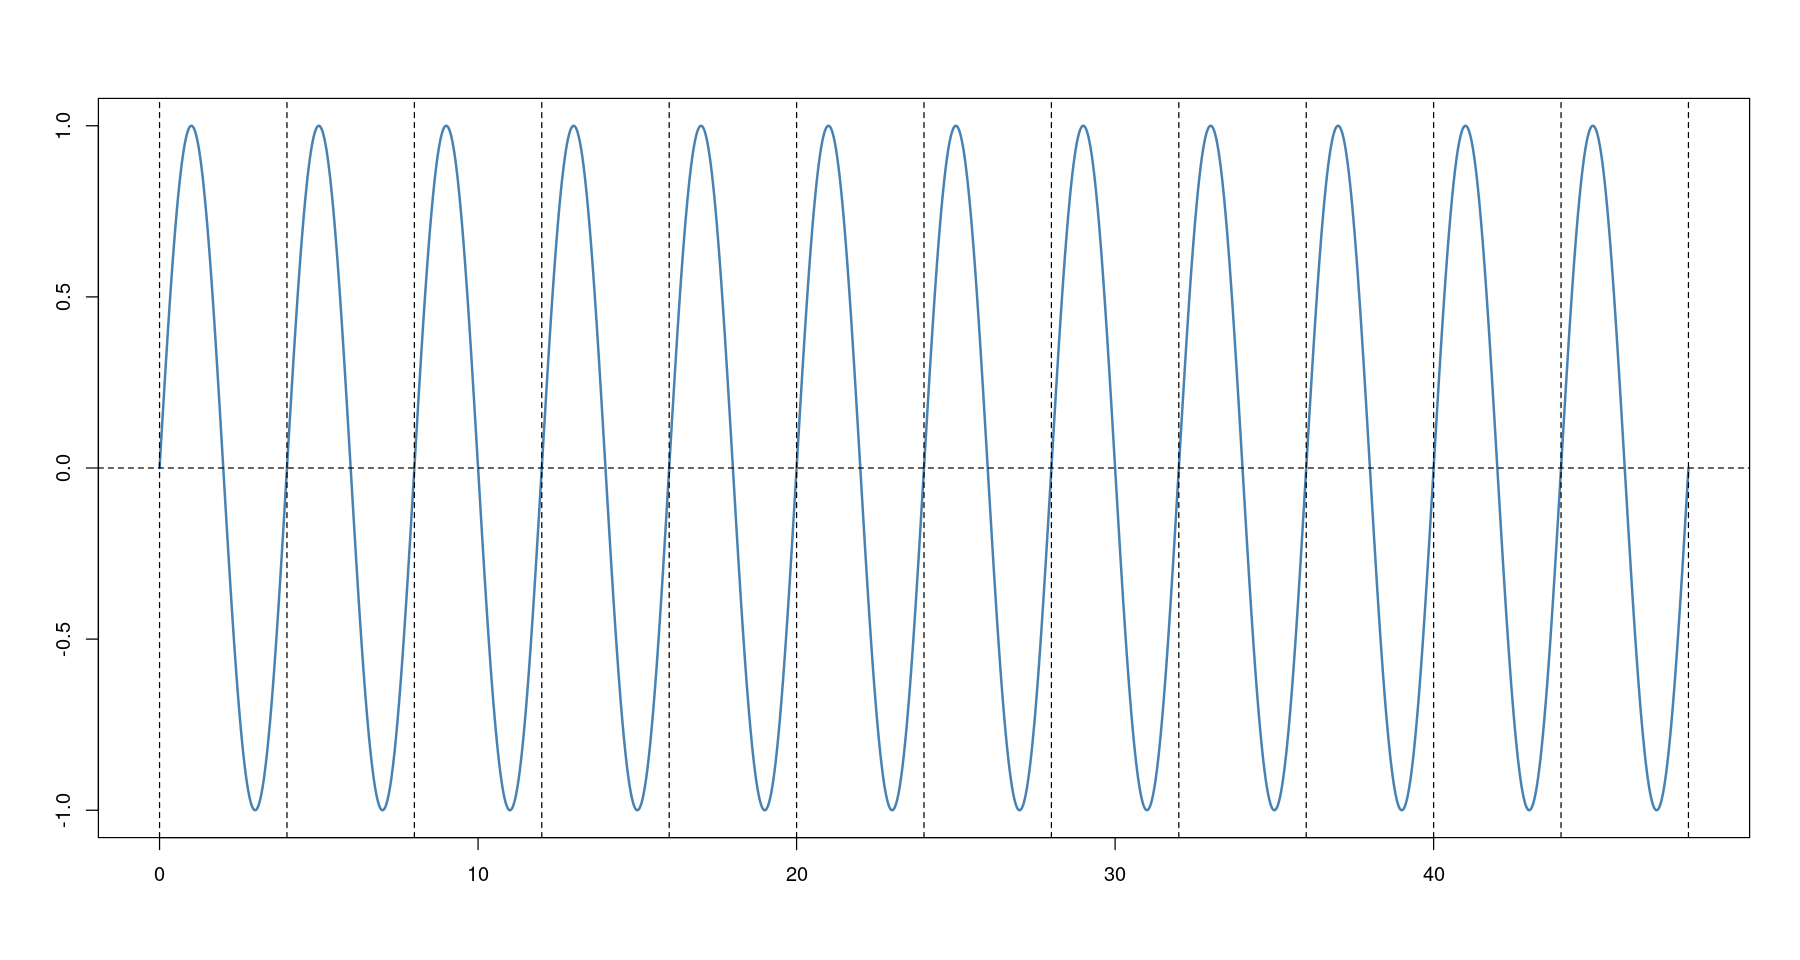

In [8]:
# 주기 = 4
s <- 4
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="")
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)


`-` sin + cos

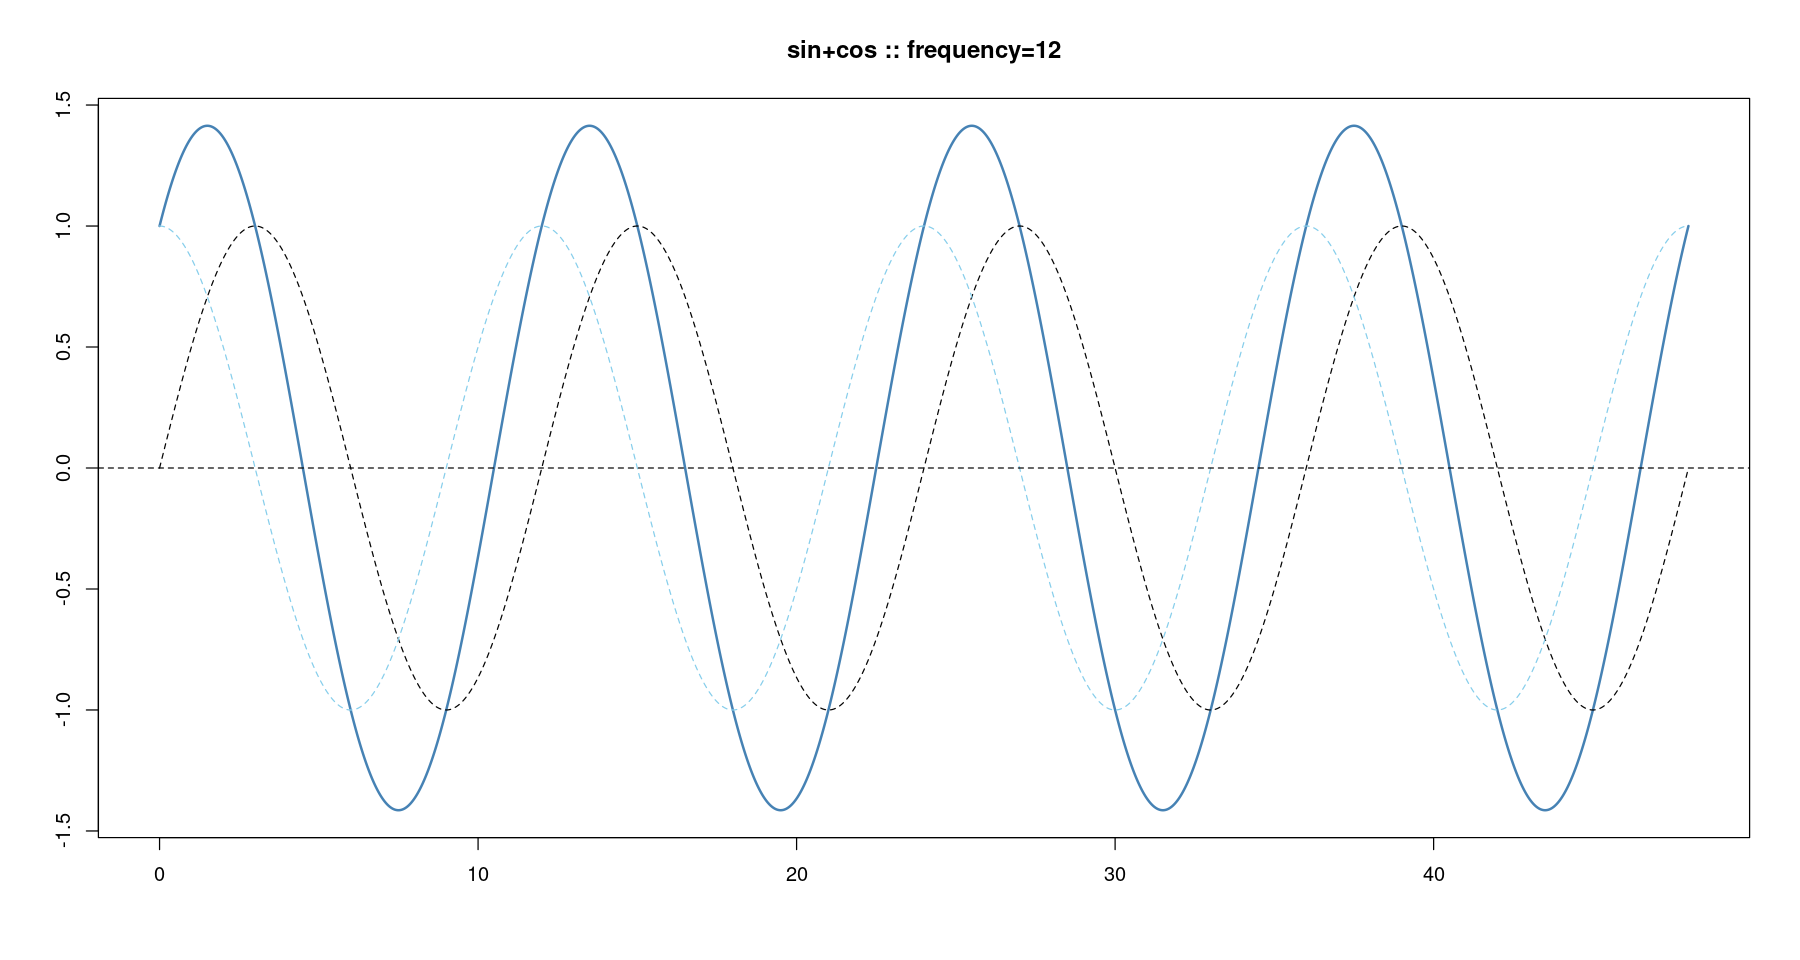

In [9]:
s <- 12
plot(x, sin(2*pi*x/s)+cos(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin+cos :: ', "frequency=", s))
lines(x, sin(2*pi*x/s), col='grey1', lty=2)
lines(x, cos(2*pi*x/s), col='skyblue', lty=2)
abline(h=0, lty=2)
#abline(v= seq(0, 48, by=s), lty=2)
#abline(v= seq(1.5, 48, by=s), lty=2)


`-` 여러 주기의 함수 합치기

- 주기가 12, 6인 sin함수 더하기: sin$\left(\dfrac{2 \pi t}{12} \right)$ +  sin$\left(\dfrac{2 \pi t}{6} \right)$

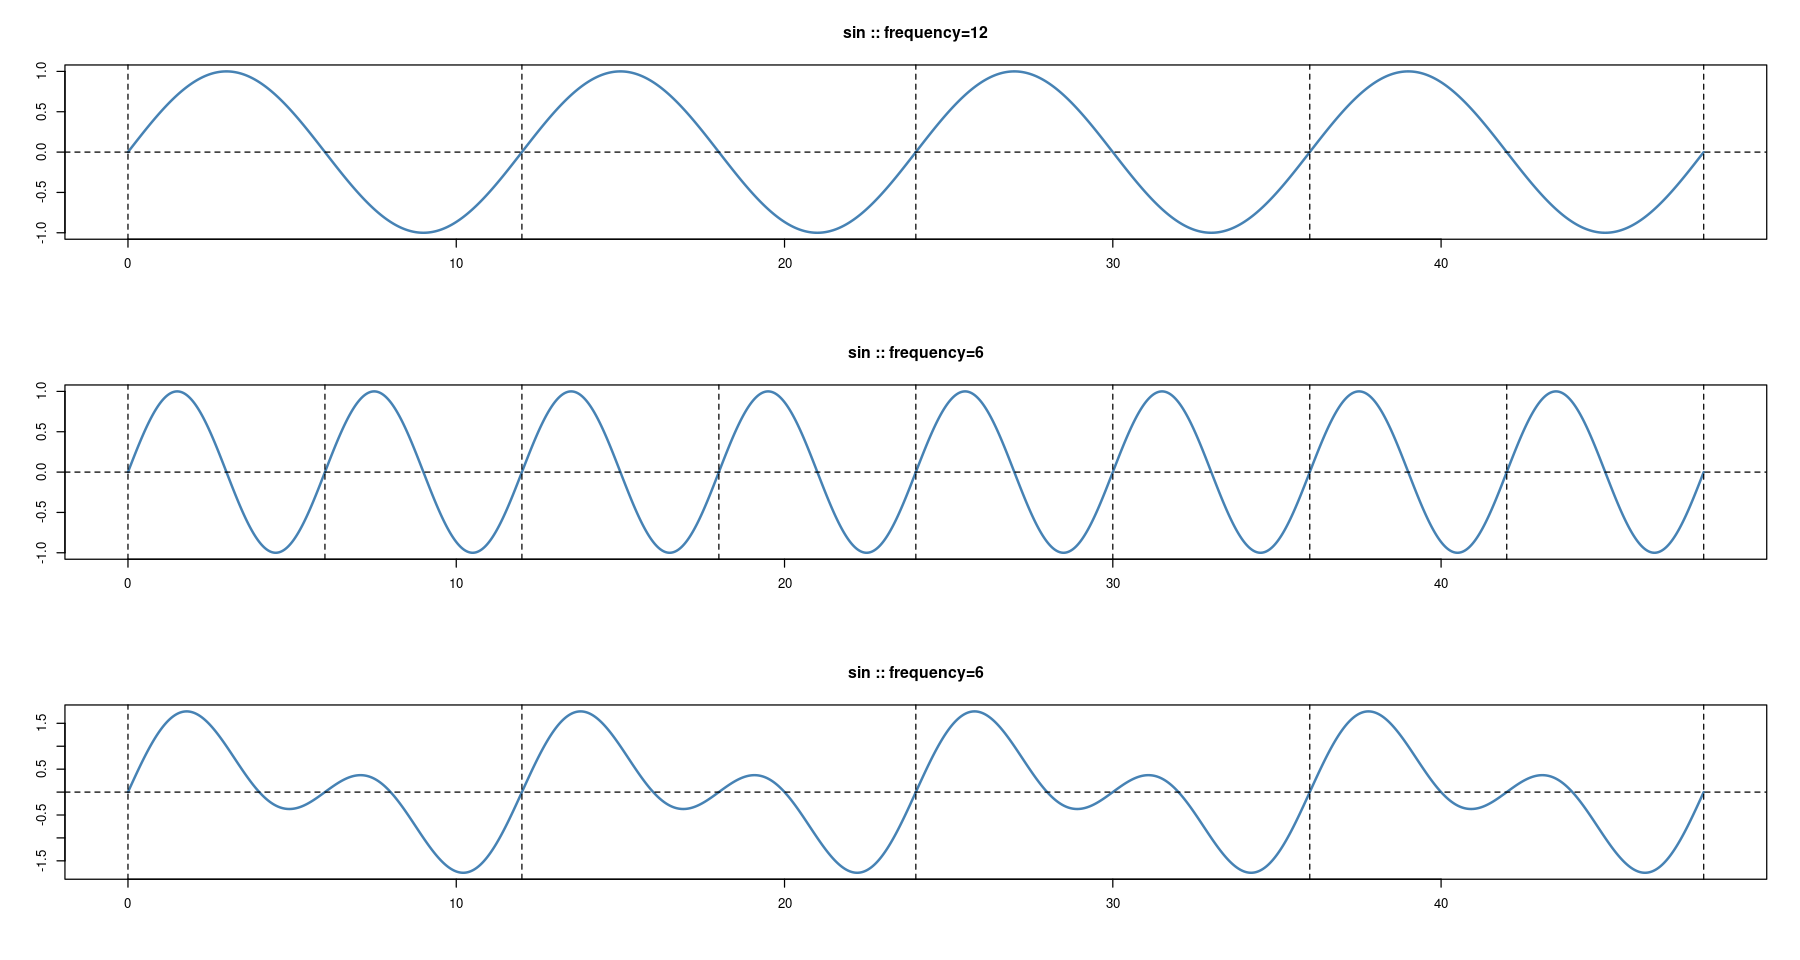

In [10]:
par(mfrow=c(3,1))
s<-12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)
s<-6
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=s), lty=2)
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s))
abline(h=0, lty=2)
abline(v= seq(0, 48, by=12), lty=2)


- 주기가 12, 6인 sin함수 더하기: $2sin \left(\dfrac{2 \pi t}{12} \right)$ +  $0.8sin\left(\dfrac{2 \pi t}{6} \right)$

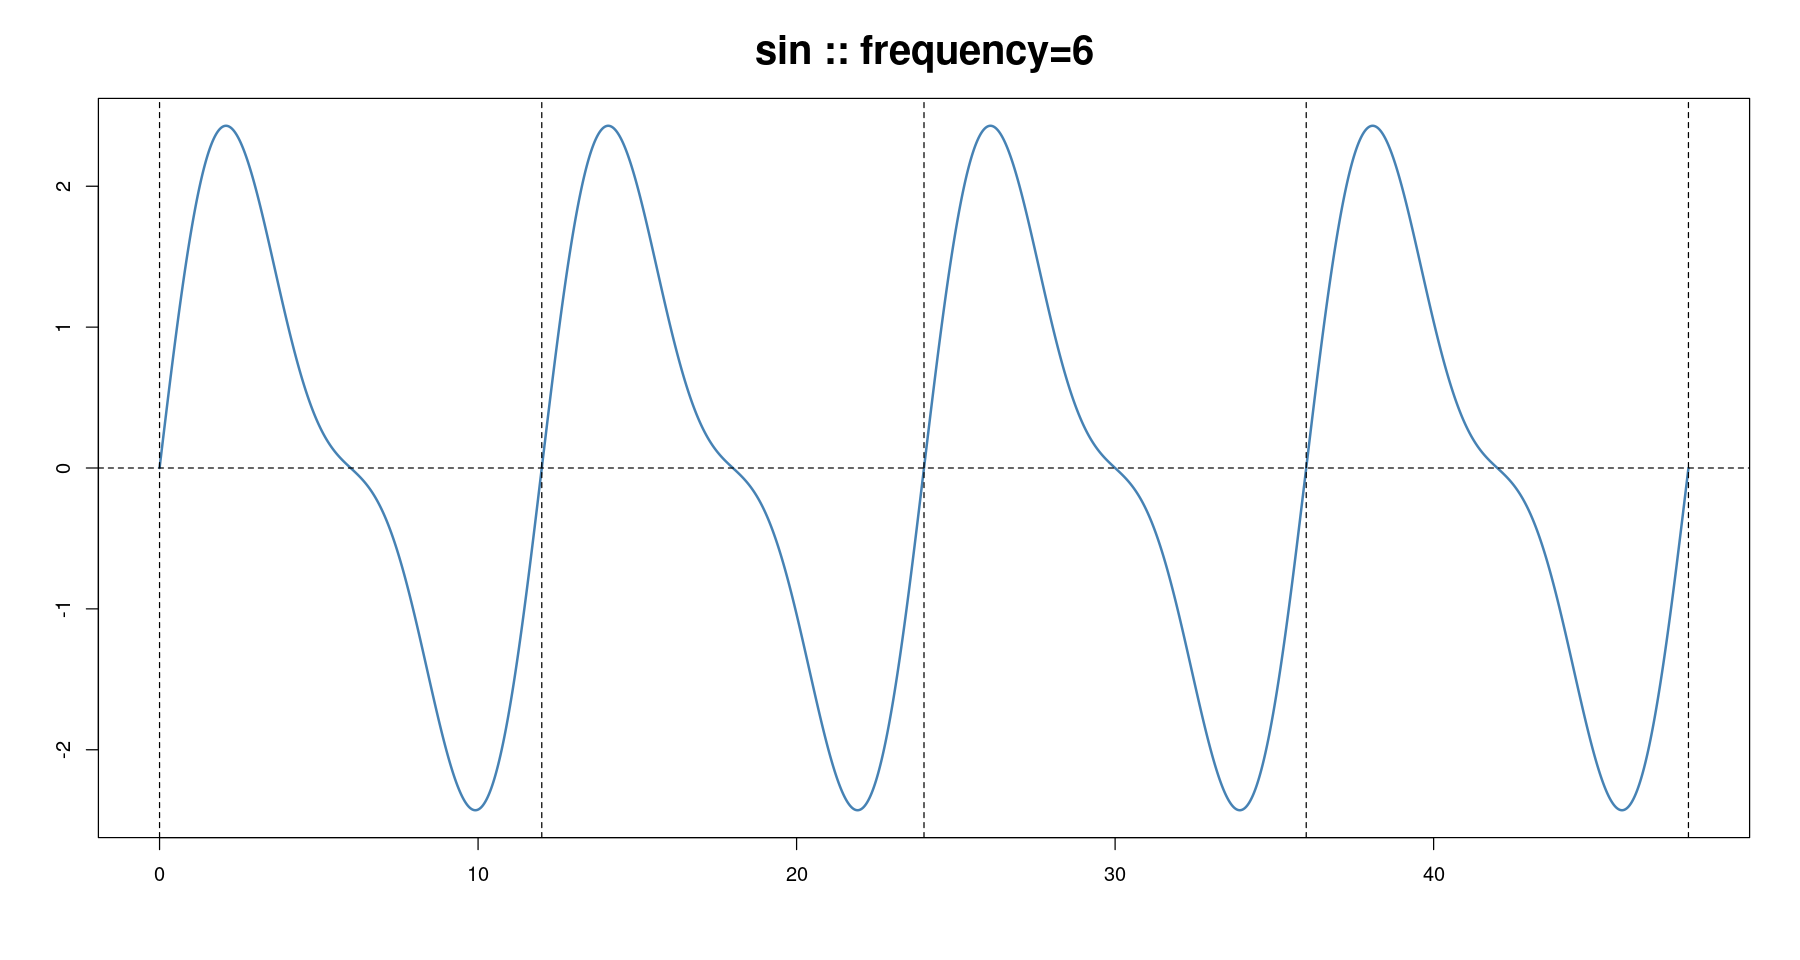

In [11]:
plot(x, 2*sin(2*pi*x/12)+0.8*sin(2*pi*x/6), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 48, by=12), lty=2)


- 주기가 12, 6, 3인 sin함수 더하기: $sin \left(\dfrac{2 \pi t}{12} \right)$ +  $sin\left(\dfrac{2 \pi t}{6} \right)$ + $sin\left(\dfrac{2 \pi t}{3} \right)$

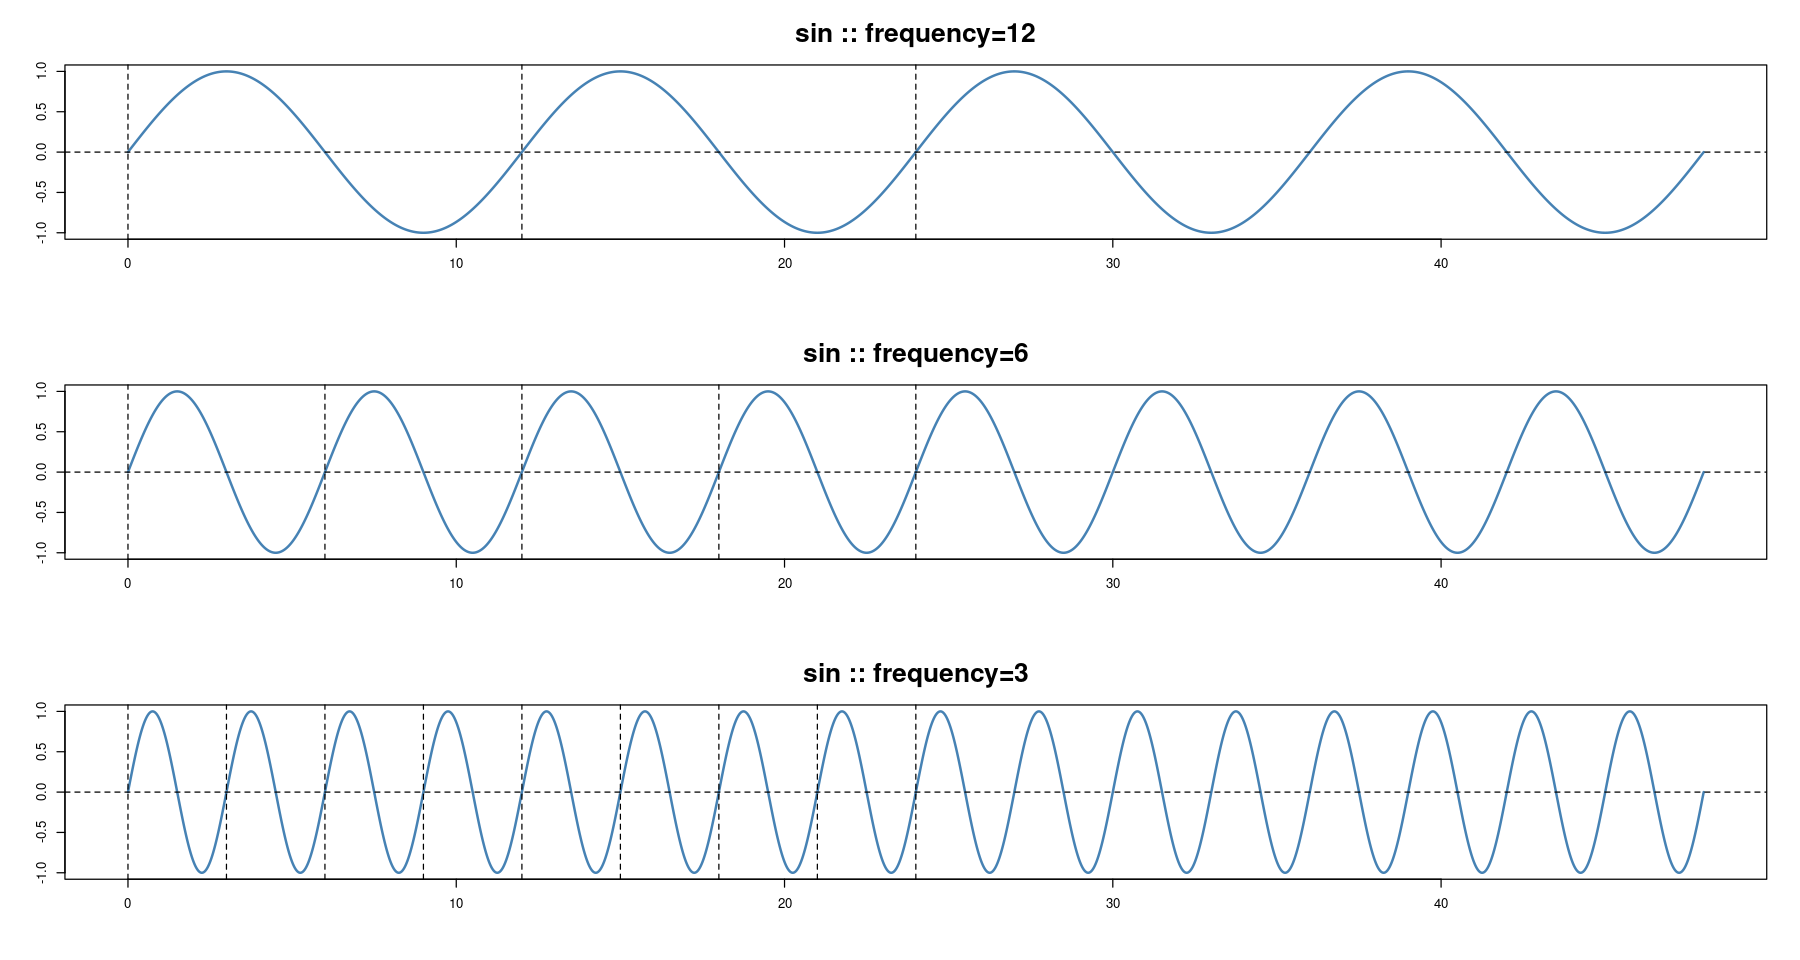

In [12]:
par(mfrow=c(3,1))
s<-12
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)
s<-6
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)
s<-3
plot(x, sin(2*pi*x/s), type='l', col='steelblue', lwd=2,
 xlab="", ylab="", main=paste0('sin :: ', "frequency=", s),cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=s), lty=2)

In [13]:
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3), type='l', col='steelblue', l
 xlab="", ylab="", main=paste0('sin + sin + sin :: ', "frequency=", 12),cex.
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)


ERROR: Error in parse(text = x, srcfile = src): <text>:2:2: unexpected symbol
1: plot(x, sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3), type='l', col='steelblue', l
2:  xlab
    ^


`-` 주기와 추세가 모두 있는 경우

In [14]:
par(mfrow=c(3,1))
plot(x, sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3),
     type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main=paste0('sin + sin + sin :: ', "frequency=", 12), cex
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)

y <- sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3)+
    cos(2*pi*x/12)+cos(2*pi*x/6)+cos(2*pi*x/3)

plot(x,y, type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main="s+s+s+c+c+c : frequency=12", cex.main=2)
abline(h=0, lty=2)
abline(v= seq(0, 24, by=12), lty=2)

y2 <- x*0.5 + sin(2*pi*x/12)+sin(2*pi*x/6)+sin(2*pi*x/3)+
    cos(2*pi*x/12)+cos(2*pi*x/6)+cos(2*pi*x/3)

plot(x,y2, type='l', col='steelblue', lwd=2,
    xlab="", ylab="", main="s+s+s+c+c+c : frequency=12", cex.main=2)
abline(a = 0, b = 0.5, lty=2)
abline(v= seq(0, 24, by=12), lty=2)


ERROR: Error in parse(text = x, srcfile = src): <text>:5:1: unexpected symbol
4:     xlab="", ylab="", main=paste0('sin + sin + sin :: ', "frequency=", 12), cex
5: abline
   ^


- 강의노트에 있는 그림

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


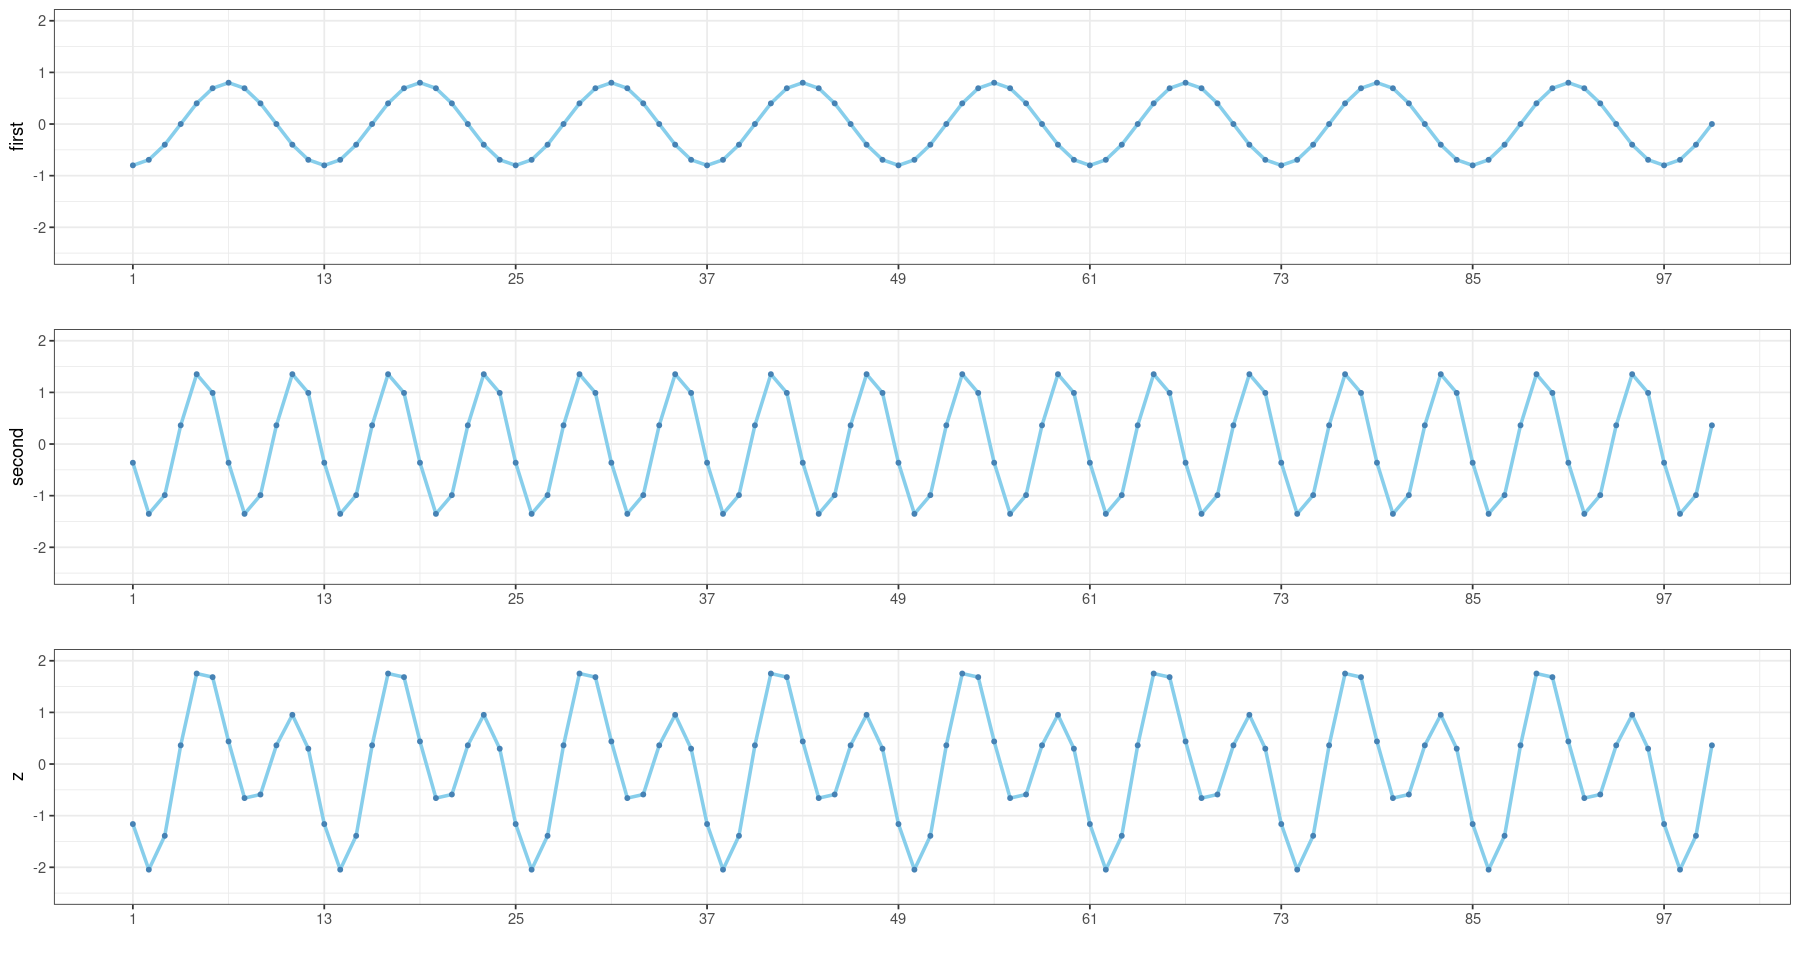

In [15]:
n <- 100;
t <- 1:n
a1 <- -0.8;
a2 <- 1.4
phi1 <- pi/3;
phi2 <- 3*pi/4
first <- a1*sin(pi*t/6+phi1) # 첫 번째 주기성분
second <- a2*sin(pi*t/3+phi2) # 두 번째 주기성분

dt <- data.frame(t=t,
                 first = first,
                 second=second,
                 z = first+second)
p1 <- ggplot(dt, aes(t,first)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 ylim(-2.5,2)+xlab("")+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 theme_bw()

p2 <- ggplot(dt, aes(t,second)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 ylim(-2.5,2)+xlab("")+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 theme_bw()

p3 <- ggplot(dt, aes(t,z)) + geom_line(col='skyblue', size=1) +
 geom_point(col='steelblue', size=1)+
 scale_x_continuous(breaks = seq(1,100, by = 12))+
 ylim(-2.5,2)+xlab("")+
 theme_bw()

grid.arrange(p1, p2, p3, nrow = 3)


# 백화점 매출액 - 지시함수 사용

In [16]:
z <-scan("depart.txt")
head(z)


Warning message in file(file, "r"):
“cannot open file 'depart.txt': No such file or directory”


ERROR: Error in file(file, "r"): cannot open the connection


In [17]:
dep <- ts(z, frequency=12, start=c(1984,1))
plot(dep)


ERROR: Error in is.data.frame(data): object 'z' not found


In [18]:
tmp.data <- data.frame(
 day = seq(ymd("1984-01-01"),
 by='1 month', length.out=length(z)),
 z=z
)


ERROR: Error in seq.Date(ymd("1984-01-01"), by = "1 month", length.out = length(z)): object 'z' not found


In [ ]:
head(tmp.data)


In [ ]:
tmp.data$lndep <- log(z) #로그변환
tmp.data$y <- as.factor(as.integer(cycle(dep))) #지시함수로 사용할 주기
tmp.data$trend <- 1:length(z) #시간 변수 생성


In [ ]:
head(tmp.data)


In [ ]:
p1 <- ggplot(tmp.data, aes(day, z)) +
 geom_line(col='skyblue', lwd=2) +
 geom_point(col='steelblue', cex=1.5)+
 scale_x_date(date_breaks = "1 year", date_labels = "%Y-%m") +
 ggtitle("백화점 월별 매출액의 시계열그림") +
 theme_bw()+
 theme(axis.text = element_text(size =12),
       axis.title = element_blank(),
       title = element_text(size = 15))

p2 <- ggplot(tmp.data, aes(day, lndep)) +
 geom_line(col='skyblue', lwd=2) +
 geom_point(col='steelblue', cex=1.5)+
 scale_x_date(date_breaks = "1 year", date_labels = "%Y-%m") +
 ggtitle("로그변환 후 백화점 월별 매출액의 시계열그림") +
 theme_bw()+
 theme(axis.text = element_text(size =12),
       axis.title=element_blank(),
       title = element_text(size = 15))

grid.arrange(p1,p2,nrow=2)


In [ ]:
par(mfrow=c(2,1)) 
plot(z~day, tmp.data, type='l')
plot(log(z)~day, tmp.data, type='l')


`-` 모형 적합: $log(Z_t) = \beta_{trend}t + \beta_1 I_{t,1} + \dots + \beta_{12} I_{t,12} + \epsilon_t (\beta_0=0)$

In [ ]:
reg <- lm(lndep ~ 0 + trend+y, data=tmp.data ) #beta_0 = 0
summary(reg)


`-` 모형 적합: $log(Z_t) = \beta_0+ \beta_{trend}t + \beta_2 I_{t,2} + \dots + \beta_{12} I_{t,12} + \epsilon_t (\beta_1=0)$

In [ ]:
reg2 <- lm(lndep ~ trend+y, data=tmp.data ) #beta_1=0
summary(reg2)


In [ ]:
contrasts(tmp.data$y)

`-` 모형 적합: $log(Z_t) = \beta_0+ \beta_{trend}t + \beta_1 I_{t,1} + \dots + \beta_{11} I_{t,11} + \epsilon_t (\sum_{i=1}^{12} \beta_i=0)$

In [ ]:
reg3 <- lm(lndep ~ trend+y, data=tmp.data,
 contrasts = list(y = "contr.sum")) #sum beta_i = 0
# b1 + ... +b12 = 0 => b12 = -(b1+...+b11)
summary(reg3)


In [ ]:
head(data.frame(hat_y1 = fitted(reg),
 hat_y2 = fitted(reg2),
 hat_y3 = fitted(reg3)))


In [ ]:
plot(lndep~day, tmp.data,
 main = 'observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(lndep~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(reg), col='red', lty=2, lwd=2

## 잔차 분석

In [ ]:
plot(tmp.data$day, resid(reg),
 pch=16, cex=2, xaxt='n', type='b',
 xlab="", ylab="", main="잔차의 시계열 그림", cex.main=2)
abline(h=0, lty=2, lwd=2)

## 독립성 검정 : dW test

In [ ]:
dwtest(reg, , alternative="two.sided")

In [ ]:
dwtest(reg)

## 정규분포 검정 (shapiro-wilk test)

`-` 가설 

$H_0$: 정규분포를 따른다. VS $H_1$: 정규분포를 따르지 않는다.


In [ ]:
hist(resid(reg))


In [ ]:
shapiro.test(resid(reg)) #H_0 : 정규분포를 따른다.


## 등분산성검정 (Breusch–Pagan test)


`-` 가설 

$H_0$: 등분산 VS $H_1$: 이분산


In [ ]:
bptest(reg)

## 적립값에 대한 MSE 구하기

$$MSE=\frac{1}{n} \sum_{t=1}^n (Z_t - \hat{Z_t})^2$$

In [ ]:
hat_z = exp(fitted(reg))
head(hat_z)

In [ ]:
mse_reg_indicator <- sum((z- hat_z)^2)/length(z)
mse_reg_indicator


## 백화점 매출액 - 삼각함수 이용

`-` 데이터 생성

In [ ]:
tmp.data_2 <- data.frame(
 lndep = tmp.data$lndep,
 trend = tmp.data$trend)

In [ ]:
head(tmp.data_2)


In [ ]:
dt1 <- Reduce(cbind.data.frame, lapply(as.list(1:5), function(i) sin(2*pi*i/12*t
head(dt1)


In [ ]:
names(dt1) <- paste("sin", c(12,6,4,3,2.4), sep="_")
head(dt1)


In [ ]:
dt2 <- Reduce(cbind.data.frame, lapply(as.list(1:5), function(i) cos(2*pi*i/12*t
names(dt2) <- paste("cos", c(12,6,4,3,2.4), sep="_")

In [ ]:
tmp.data_3 <- cbind.data.frame(tmp.data_2, dt1, dt2)
head(tmp.data_3)

`-` 모형 적합

$$Z_t = \beta_0 + \beta_1 t + \sum_{i=1}^5  \{ \beta_{1,i} sin \left( \frac{2 \pi ti}{12} \right) + \beta_{2,i} cos \left( \frac{2\pi ti}{12} \right) \}$$

In [ ]:
reg_sin <- lm(lndep ~., data=tmp.data_3)
summary(reg_sin)

In [ ]:
plot(lndep~tmp.data$day, tmp.data_3,
     main = 'observation vs. fitted value',
     xlab="", ylab="",
     type='l',
     col='skyblue',
     lwd=2, cex.axis=2, cex.main=2) +
 points(lndep~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(reg_sin), col='red', lty=2, lwd=2)

## 잔차분석

In [ ]:
plot(tmp.data$day, resid(reg_sin),
 pch=16, cex=2, xaxt='n', type='b',
 xlab="", ylab="", main="잔차의 시계열 그림", cex.main=2)
abline(h=0, lty=2, lwd=2)


## 독립성검정 : DW test


In [ ]:
# DW tets
dwtest(reg_sin, alternative = "two.side")

In [ ]:
dwtest(reg_sin, alternative = "less"

In [ ]:
mse_reg_indicator <- sum((z- hat_z)^2)/length(z)
mse_reg_indicator

In [ ]:
mse_reg_sin <- sum((z- exp(fitted(reg_sin)))^2)/length(z)
mse_reg_sin

In [ ]:
new_data <- data.frame(
     trend = 61:72,
     y = as.factor(1:12)
     )
new_data

In [ ]:
# predict_result <- as.data.frame(predict(reg, newdata = new_data, interval = "pre

In [ ]:
predict_result$fitted_dep <- exp(predict_result$fit)
predict_result$fitted_dep_l <- exp(predict_result$lwr)
predict_result$fitted_dep_u <- exp(predict_result$upr)
predict_result


In [ ]:
plot(z~tmp.data$trend, tmp.data,
     main = 'observation vs. fitted value',
     xlab="", ylab="",
     xlim=c(1,72),
     ylim=c(400,3000),
     type='l',
     lwd=2)
lines(61:72, predict_result$fitted_dep, col='darkorange', lwd=2)
lines(61:72, predict_result$fitted_dep_l, col='steelblue', lwd=2, lty=2)
lines(61:72, predict_result$fitted_dep_u, col='steelblue', lwd=2, lty=2)